In [1]:
from tpknnsource import *
from collections import Counter
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split

# 1)

In [2]:
n1 = 150
n2 = 150
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

In [3]:
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

In [4]:
n1 = 75
n2 = 75
sigma1 = 1.
sigma2 = 5.
X3, y3 = rand_clown(n1, n2, sigma1, sigma2)

In [5]:
n1 = 75
n2 = 75
sigma = 0.1
X4, y4 = rand_checkers(n1, n2, sigma)

les fonctions renvoient les coordonnes des points aleatoires sous la loi normale.
la seconde variable est leurs étiquette -1, 1 (jdd #1 et #3)  ou 1, 2, 3 (jdd #2, #4)

# 2)

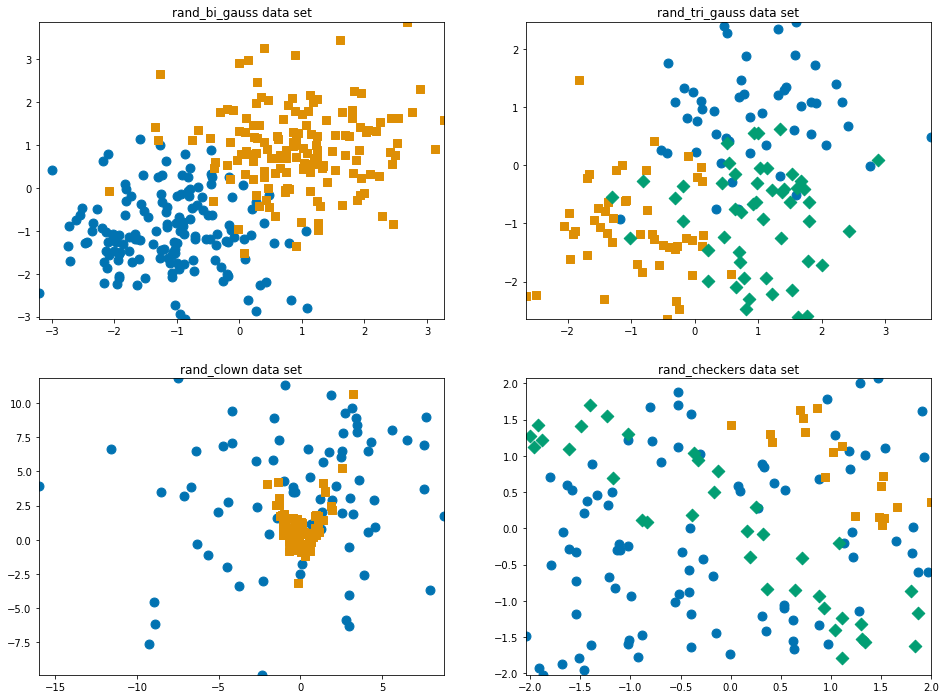

In [6]:
plt.close("all")
plt.figure(1, figsize=(16, 12))
plt.subplot(221)
plt.title('rand_bi_gauss data set')
plot_2d(X1, y1)
plt.subplot(222)
plt.title('rand_tri_gauss data set')
plot_2d(X2, y2)
plt.subplot(223)
plt.title('rand_clown data set')
plot_2d(X3, y3)
plt.subplot(224)
plt.title('rand_checkers data set')
plot_2d(X4, y4)
plt.show()

# 3)

In [7]:
def getDistance(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)


def knnClf(xNew, X, y, k):
    distances = []
    for idx, e in enumerate(X):
        distances.append([getDistance(xNew, e), y[idx]])

    votes = np.array(sorted(distances)[:k])[:, 1]
    return Counter(votes).most_common()[0][0]


In [8]:
knnClf([1, 1], X4, y4, 11)

1.0

# 4)

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade kNN classifier class """

    def __init__(self, n_neighbors=5):
        self.k = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        result = []
        for x in X:
            distances = []
            for idx, e in enumerate(self.X_train):
                distances.append([np.sqrt((x[0] - e[0]) ** 2 + (x[1] - e[1]) ** 2), self.y_train[idx]])
            votes = np.array(sorted(distances)[:self.k])[:, 1]
            result.append(Counter(votes).most_common()[0][0])
        return result

In [10]:
knn_clf_homemade = KNNClassifier(11)
knn_clf_homemade.fit(X2[::2], y2[::2]) # indice pair 
knn_clf_homemade.predict([[1,1],[-2, -1]])

[1.0, 2.0]

# 5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

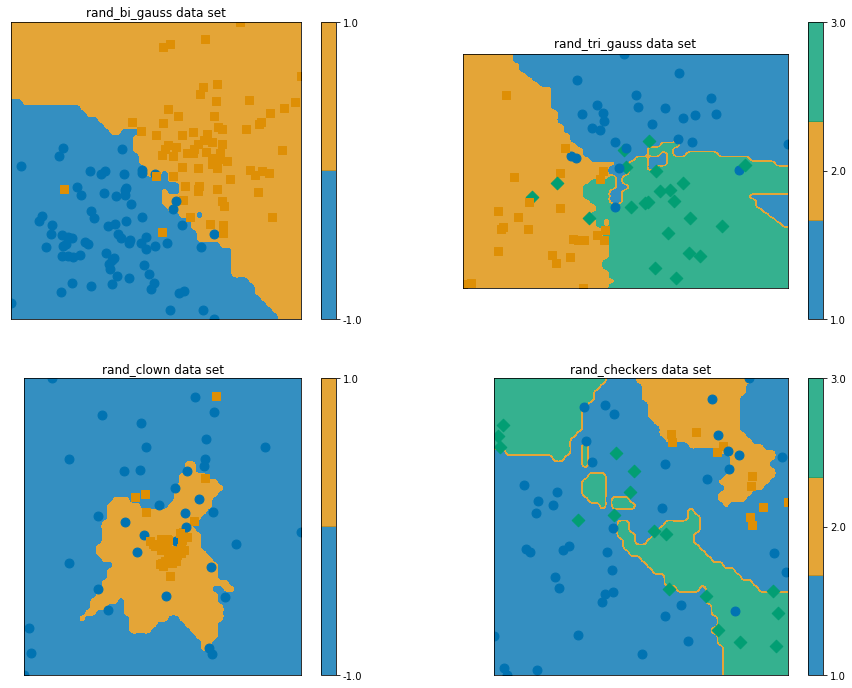

In [12]:
plt.close("all")
plt.figure(5, figsize=(16, 12))

plt.subplot(221)
plt.title('rand_bi_gauss data set')
knn_clf1 = KNeighborsClassifier(n_neighbors=5)
knn_clf1.fit(X1[::2], y1[::2]) # indice pair 
frontiere_new(lambda x: knn_clf1.predict([x]), X1[1::2], y1[1::2]) # indice impair 

plt.subplot(222)
plt.title('rand_tri_gauss data set')
knn_clf2 = KNeighborsClassifier(n_neighbors=5)
knn_clf2.fit(X2[::2], y2[::2])
frontiere_new(lambda x: knn_clf2.predict([x]), X2[1::2], y2[1::2])

plt.subplot(223)
plt.title('rand_clown data set')
knn_clf3 = KNeighborsClassifier(n_neighbors=5)
knn_clf3.fit(X3[::2], y3[::2])
frontiere_new(lambda x: knn_clf3.predict([x]), X3[1::2], y3[1::2])

plt.subplot(224)
plt.title('rand_checkers data set')
knn_clf4 = KNeighborsClassifier(n_neighbors=5)
knn_clf4.fit(X4[::2], y4[::2])
frontiere_new(lambda x: knn_clf4.predict([x]), X4[1::2], y4[1::2])
plt.show()

# 6)

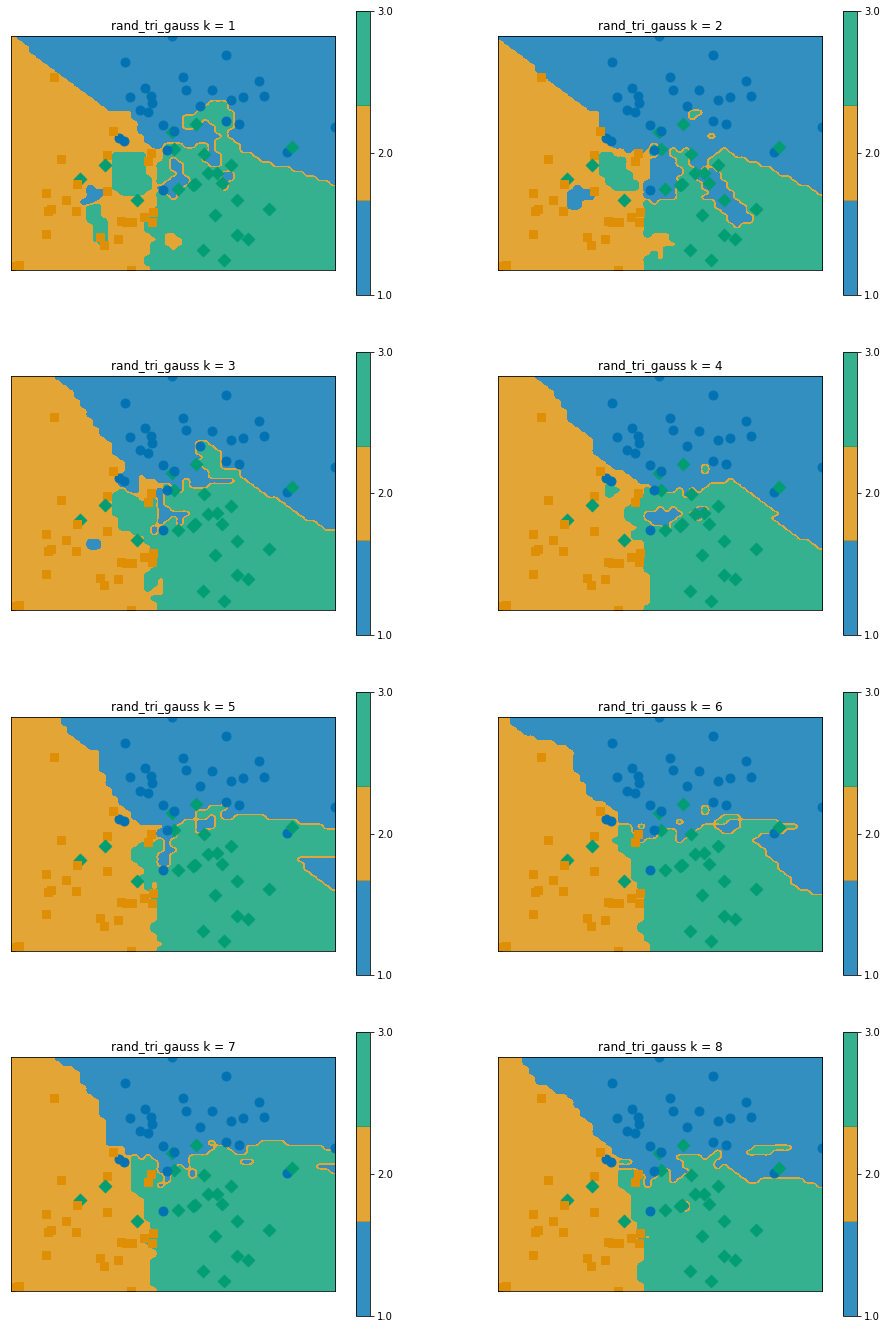

In [13]:
plt.close("all")
plt.figure(6, figsize=(16, 24))

for k in range(1, 9):
    plt.subplot(420+k)
    plt.title(f"rand_tri_gauss k = {k}")
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X2[::2], y2[::2])
    frontiere_new(lambda x:knn_clf.predict([x]), X2[1::2], y2[1::2])

plt.show()

la frontiere est plus simple qaund le 'k' est plus grand

# 7)

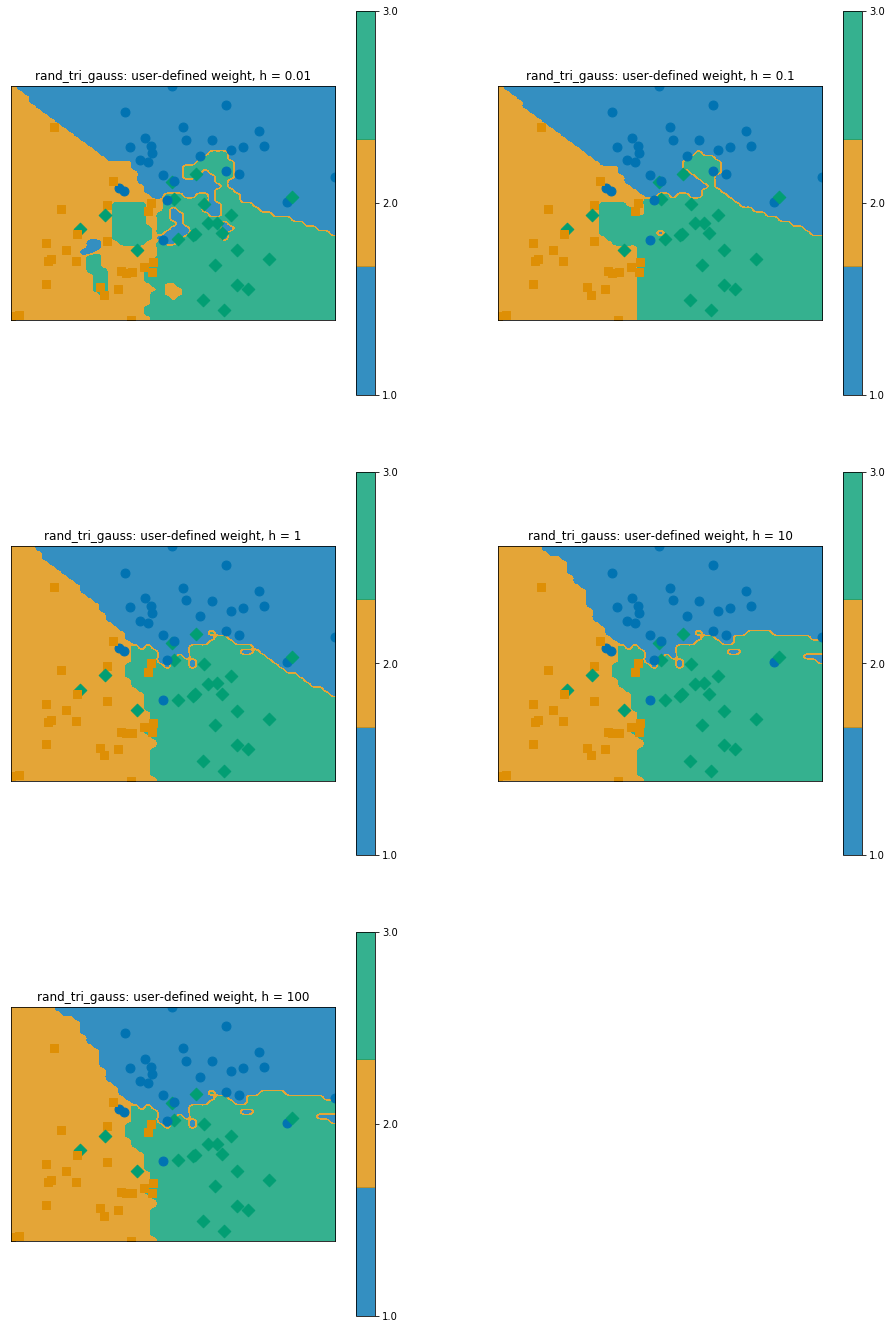

In [14]:
plt.close("all")
plt.figure(7, figsize=(16, 24))

for idx, j in enumerate([-2, -1, 0, 1, 2]):
    plt.subplot(321+idx)
    h = 10 ** j
    plt.title(f"rand_tri_gauss: user-defined weight, h = {h}")

    def weight_func(d):
        return np.exp(-d**2/h)

    knn_clf = KNeighborsClassifier(n_neighbors=7, weights=weight_func)
    knn_clf.fit(X2[::2], y2[::2])
    frontiere_new(lambda x: knn_clf.predict([x]), X2[1::2], y2[1::2])


plt.show()

# 8)

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X2[::2], y2[::2]) 
# custom knn score function
def knnErrorRate(clf, X, y):
    y_predict = clf.predict(X)
    return 1 - np.sum(np.array(y_predict == y, dtype="int")) / len(y_predict)

print("le taux d’erreur sur les mêmes données d’apprentissage: ", knnErrorRate(knn_clf, X2[::2], y2[::2]))
print("le taux d’erreur sur les mêmes données de test: ", knnErrorRate(knn_clf, X2[1::2], y2[1::2]))

le taux d’erreur sur les mêmes données d’apprentissage:  0.0
le taux d’erreur sur les mêmes données de test:  0.17333333333333334


In [16]:
# utilise la function native score de KNeighborsClassifier
print("le taux d’erreur sur les mêmes données d’apprentissage: ", 1-knn_clf.score(X2[::2], y2[::2]))
print("le taux d’erreur sur les mêmes données de test: ", 1-knn_clf.score(X2[1::2], y2[1::2]))

le taux d’erreur sur les mêmes données d’apprentissage:  0.0
le taux d’erreur sur les mêmes données de test:  0.17333333333333334


le model est "overfitting" sur les mêmes données d’apprentissage lorsque k = 1

# 9)

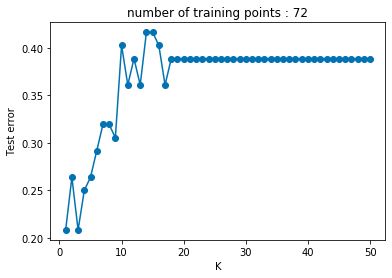

In [17]:
X4_error_rate = ErrorCurve(k_range=list(range(1, 51)))
X4_error_rate.fit_curve(X4[::2], y4[::2], X4[1::2], y4[1::2])
X4_error_rate.plot()

commentaire:
a parir de k=25, le taux erreur ne change plus, parceque il predict tous les y comme une seul valeur, le taux d'erreur sera fixe par la proportion de classification

# 10)

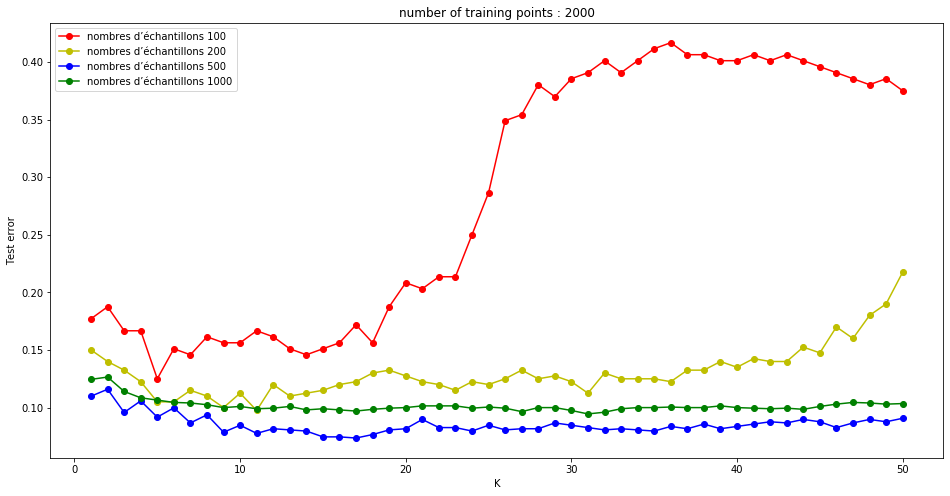

In [18]:
plt.close("all")
plt.figure(10, figsize=(16, 8))
n_colors = {100: 'r', 200: 'y', 500: 'b', 1000: 'g'}
for n, c in n_colors.items():
    X_error_rate = ErrorCurve(k_range=list(range(1, 51)))
    X_train, y_train = rand_checkers(n, n)
    X_test, y_test = rand_checkers(n, n)
    X_error_rate.fit_curve(X_train, y_train, X_test, y_test)
    X_error_rate.plot(color=c, label=f"nombres d’échantillons {n}")
plt.legend()
plt.show()

la meilleure valeur de k est different pour les differents datasets.

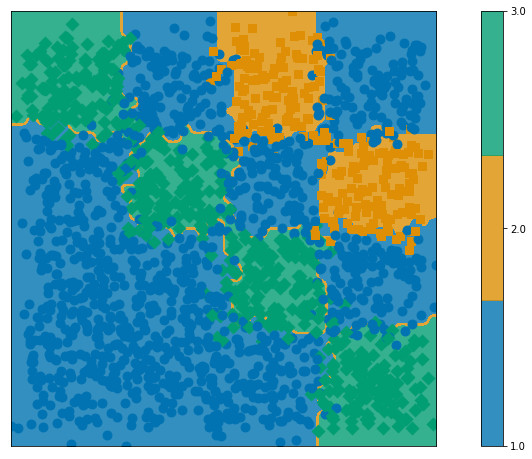

In [19]:
X1000_train, y1000_train = rand_checkers(1000, 1000)
X1000_test, y1000_test = rand_checkers(1000, 1000)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X1000_train, y1000_train)
plt.figure(102, figsize=(16, 8))
frontiere_new(lambda x: knn_clf.predict([x]), X1000_test, y1000_test)

# 11) A votre avis, quels sont les avantages et les inconvénients de la méthode des plus proches voisins : temps de calcul ? passage à l’échelle ? interprétabilité ?

#### avantages:  
Interprétable et simple
#### inconvénients:
Haute complexité de temporelle et spatiale

# 12)

In [20]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

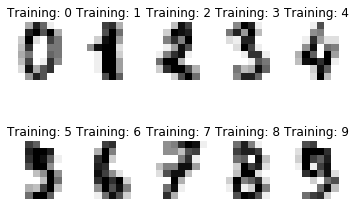

In [21]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

les donnes dans le dataset sont les image en 8*8 pix et label du 0 a 9

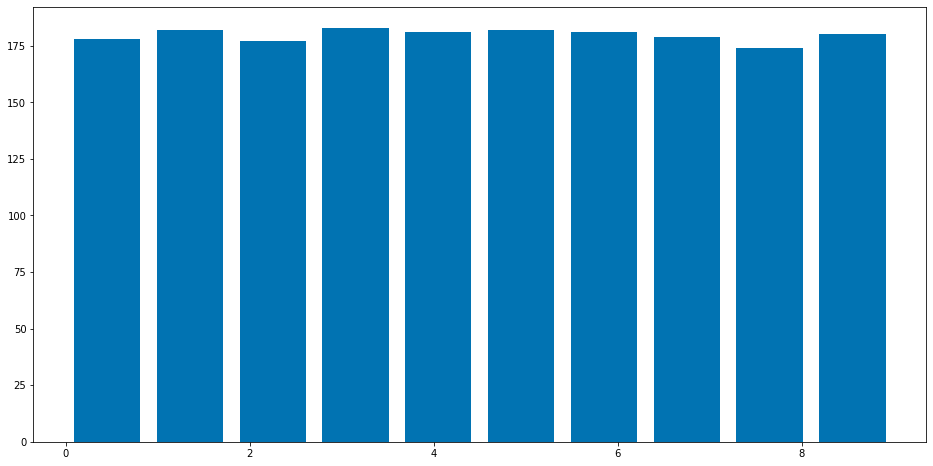

In [22]:
plt.figure(12, figsize=(16,8))
plt.hist(digits.target, bins=10, rwidth=0.8)
plt.show()

In [23]:
n_samples = len(digits.images)
images_data = digits.images.reshape((n_samples, -1))

knn_clf = KNeighborsClassifier(n_neighbors=30)

# la première partie pour l’apprentissage
knn_clf.fit(images_data[:n_samples // 2], digits.target[:n_samples // 2])

# la deuxième pour le test
y_test = digits.target[n_samples // 2:]
y_pred = knn_clf.predict(images_data[n_samples // 2:])
# 1 - np.sum(np.array(y_test ==y_pred ), dtype="int") / len(images_data[n_samples // 2:])
print("taux d’erreur: ", 1 - knn_clf.score(images_data[n_samples // 2:], y_test))

taux d’erreur:  0.07452725250278092


# 13)

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 82  5  1  0  1  0  0  0  2]
 [ 1  0 79  6  0  0  0  0  0  0]
 [ 0  0  0 81  0  3  0  4  1  2]
 [ 2  0  0  0 87  0  0  2  1  0]
 [ 0  0  0  0  0 85  3  0  0  3]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  6  1  6  0  4  1  1 68  1]
 [ 1  0  0  4  0  2  0  0  1 84]]


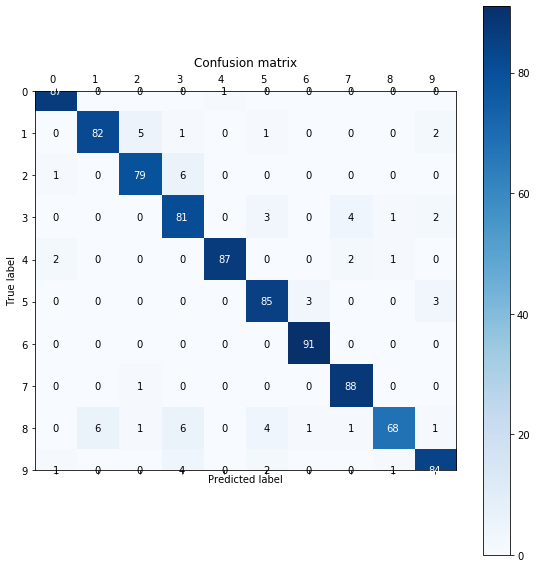

In [24]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)
classes = digits.target_names[unique_labels(y_test, y_pred)]
fig, ax = plt.subplots(1, 1, figsize=(8,8))
im = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(
         xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()


# 14)

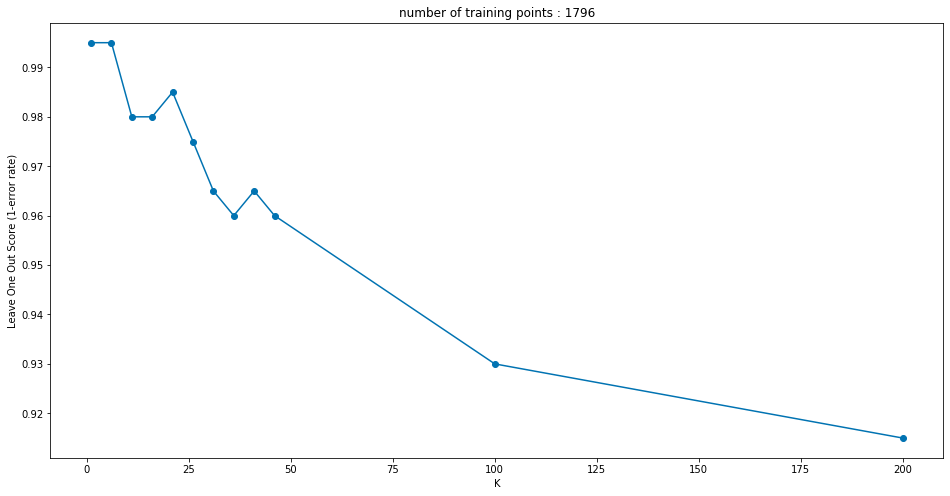

In [25]:
plt.figure(14, figsize=(16,8))
ks = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 100, 200]
loo_curve = LOOCurve(k_range=ks)
loo_curve.fit_curve(images_data, digits.target)
loo_curve.plot()

le meilleur k est equal 1

# 15)

#### Formule de Bayes: 
$ P{ ( Y = +1 | X = x ) } =\frac{P{ (X = x | Y = +1 ) } P { (Y = +1 )}}{P{ (X = x)}} $   
et  
$ P{ ( Y = -1 | X = x ) } =\frac{P{ (X = x | Y = -1 ) } P { (Y = -1 )}}{P{ (X = x)}} $   

 #### Formule des probabilités totales :
$ P{ (X = x)} = P{ (X = x | Y = +1 ) } P { (Y = +1 )} + P{ (X = x| Y = -1 ) } P { (Y = -1 )} $  

$\pi_{+} = P { (Y = +1 )}$   
$f_{+} = P{ (X = x | Y = +1 ) } $   
$f_{-} = P{ (X = x| Y = -1 ) } $   

$$ P{ ( Y = 1 | X = x ) } = \frac { \pi_{+}f_{+} }{ \pi_{+}f_{+} + (1  - \pi_{+})f_{-}} $$ 
$$ P{ ( Y = -1 | X = x ) } =\frac { (1 - \pi_{-})f_{+} }{ \pi_{+}f_{+} + (1 - \pi_{+})f_{-}} $$


# 16)

Les densités de +1 et -1 sont: :

$  f_{+} = \frac{1}{ (2 \pi) ^ {\frac{p}{2}} \sqrt{\det(\Sigma)} } 
\exp {   (-\frac{1}{2} {(x- \mu_{+})^T} \Sigma^{-1} (x- \mu_{+})) 
}  
$

et  

$  f_{-} = \frac{1}{ (2 \pi) ^ {\frac{p}{2}} \sqrt{\det(\Sigma)} } 
\exp {   (-\frac{1}{2} {(x- \mu_{-})^T} \Sigma^{-1} (x- \mu_{-})) 
}  $  
les probabilités:  

$\pi_{+} = P { (Y = +1 )} = \frac{m}{n}$  
$ P{ ( Y = 1 | X = x ) } = \frac { \pi_{+}f_{+} }{ \pi_{+}f_{+} + (1  - \pi_{+})f_{-}} = \frac { \frac{m}{n}f_{+} }{ \frac{m}{n}f_{+} + (1  - \frac{m}{n})f_{-}}$
$ P{ ( Y = -1 | X = x ) } =\frac { (1 - \pi_{+})f_{+} }{ \pi_{+}f_{+} + (1 - \pi_{+})f_{-}}  =\frac { (1 - \frac{m}{n})f_{+} }{ \frac{m}{n}f_{+} + (1 - \frac{m}{n})f_{-}} $

donc

$$ \frac{P{ ( Y = 1 | X = x ) }}{P{ ( Y =- 1 | X = x ) }}  =   \frac { \frac{m}{n}  f_{+} }{ (1-\frac{m}{n})  f_{-} }$$

$ \log(\frac{P{ ( Y = 1 | X = x ) }}{P{ ( Y =- 1 | X = x ) }}) $     
$ =  \log ( \frac{m}{n}  f_{+}    ) - \log { (1-\frac{m}{n}) f_{-})} $   
$ =  \log ( \frac{m}{n}) + \log (f_{+}  ) - \log (f_{-} ) - \log { (1-\frac{m}{n})} $  

car:  

$ \log {f_{+} } =  -\frac{1}{2} {(x- \mu_{+})^T} \Sigma^{-1} (x- \mu_{+}) - \log ( (2 \pi) ^ {\frac{p}{2}} \sqrt{\det(\Sigma)} ) $  
$\log {f_{-} } =  -\frac{1}{2} {(x- \mu_{-})^T} \Sigma^{-1} (x- \mu_{-}) - \log ( (2 \pi) ^ {\frac{p}{2}} \sqrt{\det(\Sigma)} ) $   
$ \log {f_{+} } -  \log {f_{-} }  = \frac{1}{2} ({(x- \mu_{-})^T} \Sigma^{-1} (x- \mu_{-}) - {(x- \mu_{+})^T} \Sigma^{-1} (x- \mu_{+}))$ 
 
 donc:  
 $$ \log(\frac{P{ ( Y = 1 | X = x ) }}{P{ ( Y =- 1 | X = x ) }}) = \frac{1}{2}(x^{T}\Sigma^{-1}x - x^{T}\Sigma^{-1}\mu_{-} - \mu_{-}^{T}\Sigma^{-1}x + \mu_{-}^{T}\Sigma^{-1}\mu_{-}
- x^{T}\Sigma^{-1}x + x^{T}\Sigma^{-1}\mu_{+} + \mu_{+}^{T}\Sigma^{-1}x - \mu_{+}^{T}\Sigma^{-1}\mu_{+})
$$
$$
= x^{T} \Sigma^{-1}(\mu_{+}-\mu_{-}) -\frac{1}{2} \mu^{T}_{+}\Sigma^{-1}\mu_{+} + \frac{1}{2} \mu^{T}_{-}\Sigma^{-1}\mu_{-} - \log(1-\frac{m}{n}) + \log(\frac{m}{n}) 
$$

# 17)

Si la classe est 1 alors:  
$$\frac{P{ ( Y = 1 | X = x ) }}{P{ ( Y =- 1 | X = x ) }} > 1$$
$$\log{\frac{P{ ( Y = 1 | X = x ) }}{P{ ( Y =- 1 | X = x ) }}} > 0$$
utilise le result de question 16:
$$ x^{T} \Sigma^{-1}(\mu_{+}-\mu_{-}) -\frac{1}{2} \mu^{T}_{+}\Sigma^{-1}\mu_{+}    
+ \frac{1}{2} \mu^{T}_{-}\Sigma^{-1}\mu_{-} - \log(1-\frac{m}{n}) + \log(\frac{m}{n}) > 0$$
alor pour condition 1:  
$$ x^{T} \Sigma^{-1}(\mu_{+}-\mu_{-}) >\frac{1}{2} \mu^{T}_{+}\Sigma^{-1}\mu_{+}    
- \frac{1}{2} \mu^{T}_{-}\Sigma^{-1}\mu_{-} + \log(1-\frac{m}{n}) - \log(\frac{m}{n})  $$

# Mise en oeuvre
# 18)

In [26]:
class LDAClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade LinearDiscriminantAnalysis (LDA) classifier class """

    def fit(self, X, y):
        Xp = X[y == 1, :]
        Xn = X[y == -1, :]
        n = len(X)
        m = len(Xp)
        Xp_mean = np.mean(Xp, 0)
        Xn_mean = np.mean(Xn, 0)

        Cov_p = np.cov(Xp.T)
        Cov_n = np.cov(Xn.T)

        Cov = (1/(n-2))*((m-1) * Cov_p + (n-m-1) * Cov_n)
        Cov_inv = np.linalg.inv(Cov)

        self.seprator = 0.5 * (Xp_mean.T.dot(Cov_inv).dot(Xp_mean) -
                               Xn_mean.T.dot(Cov_inv).dot(Xn_mean)) + np.log(1 - m/n) - np.log(m/n)
        self.theta = Cov_inv.dot(Xp_mean - Xn_mean)
        return self

    def predict(self, X):
        y_preds = []
        for x in X:
            if x.T.dot(self.theta) > self.seprator:
                y_pred = 1
            else:
                y_pred = -1
            y_preds.append(y_pred)
            
        return np.array(y_preds)

# 19)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [28]:
def compareLDA(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    plt.figure(19, figsize=(16, 8))

    plt.subplot(121)
    plt.title('LDAClassifier Homemade')
    lda_clf_homemade = LDAClassifier()
    lda_clf_homemade.fit(X_train, y_train)
    error_homemade = 1 - lda_clf_homemade.score(X_test, y_test)
    print(f"le taux d'erreur de LDAClassifier homemade: {error_homemade}")
    frontiere_new(lambda x: lda_clf_homemade.predict([x]), X_test, y_test)

    plt.subplot(122)
    plt.title('LinearDiscriminantAnalysis de scikit-learn')
    lda_clf_sk = LinearDiscriminantAnalysis()
    lda_clf_sk.fit(X_train, y_train)
    error_sk = 1 - lda_clf_sk.score(X_test, y_test)
    print(
        f"le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: {error_sk}")
    frontiere_new(lambda x: lda_clf_sk.predict([x]), X_test, y_test)

    plt.show()

In [29]:
X, y = rand_bi_gauss(n1=200, n2=50, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])

l’échantillon d’apprentissage doit être petit et l’échantillon de validation doit être assez grand. ci-dessous, on prend 80% de donnes pour tester

le taux d'erreur de LDAClassifier homemade: 0.050000000000000044
le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: 0.050000000000000044


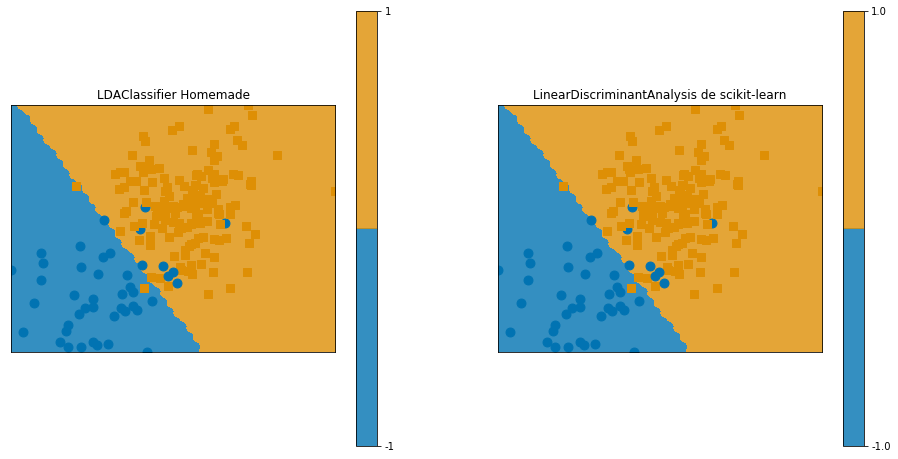

In [30]:
compareLDA(X, y, 0.8)

20% pour tester

le taux d'erreur de LDAClassifier homemade: 0.06000000000000005
le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: 0.06000000000000005


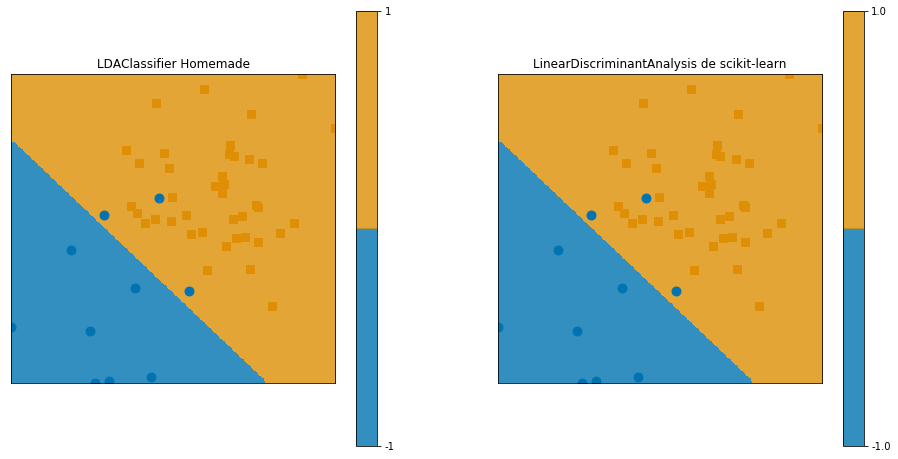

In [31]:
compareLDA(X, y, 0.2)

50% pour tester

le taux d'erreur de LDAClassifier homemade: 0.05600000000000005
le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: 0.05600000000000005


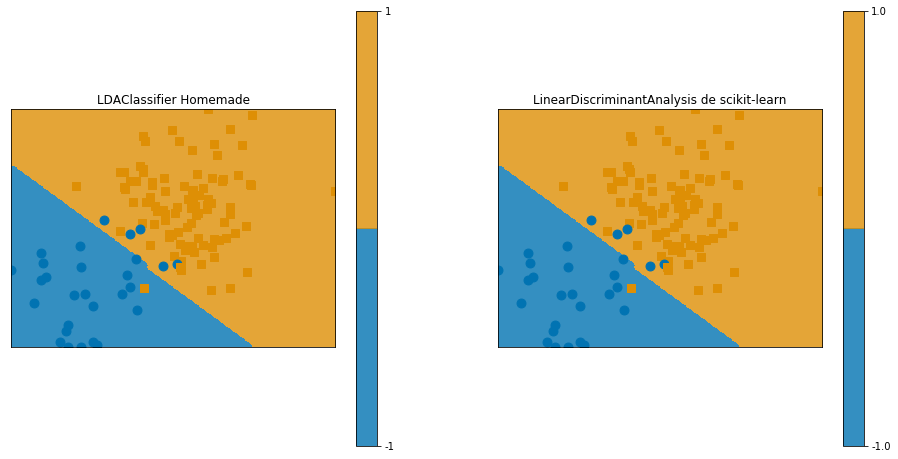

In [32]:
compareLDA(X, y, 0.5)

# 20)

#### les jeux de données #1

le taux d'erreur de LDAClassifier homemade: 0.05833333333333335
le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: 0.05833333333333335


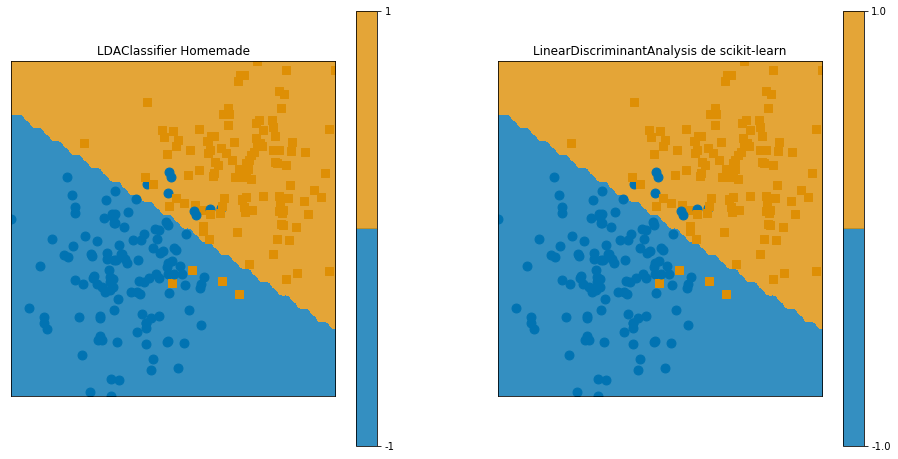

In [33]:
X1, y1 = rand_bi_gauss(n1=150, n2=150, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])
compareLDA(X1, y1, 0.8)

### les jeux de données #3

le taux d'erreur de LDAClassifier homemade: 0.3125
le taux d'erreur de LinearDiscriminantAnalysis de scikit-learn: 0.3125


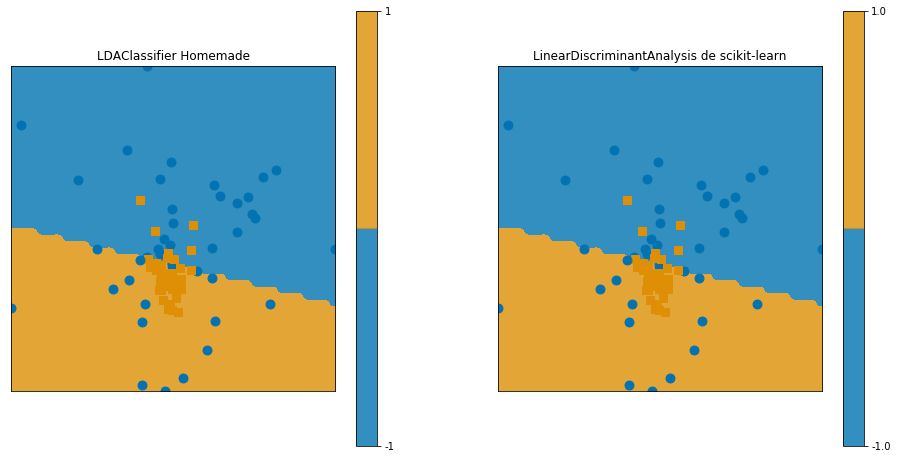

In [34]:
sigma2 = 5.
X3, y3 = rand_clown(n1=50, n2=50, sigma1=1, sigma2=5)
compareLDA(X3, y3, 0.8)

# - Régression logistique -
## Méthode discriminative avec régression logistique


In [35]:
from sklearn import linear_model

# 21)

In [36]:
def compare_lr_lda(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    lr_clf = linear_model.LogisticRegression(solver='liblinear')
    lr_clf.fit(X_train, y_train)
    print(f"le taux d'erreur de Logistic Regression Classification: {lr_clf.score(X_test, y_test)}")
    print(f"Logistic Regression,  le coefficient: {lr_clf.coef_}, l'intercept: {lr_clf.intercept_}")

    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(X_train, y_train)
    print(f"le taux d'erreur de LinearDiscriminantAnalysis: {lda_clf.score(X_test, y_test)}")
    print(f"LinearDiscriminantAnalysis,  le coefficient: {lr_clf.coef_}, l'intercept: {lr_clf.intercept_}")



#### classes déséquilibrées

In [37]:
X1, y1 = rand_bi_gauss(n1=500, n2=50, mu1=[1, 1], mu2=[1, 1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])
compare_lr_lda(X1, y1)

le taux d'erreur de Logistic Regression Classification: 0.8818181818181818
Logistic Regression,  le coefficient: [[0.15703183 0.0917561 ]], l'intercept: [2.10440042]
le taux d'erreur de LinearDiscriminantAnalysis: 0.8818181818181818
LinearDiscriminantAnalysis,  le coefficient: [[0.15703183 0.0917561 ]], l'intercept: [2.10440042]


#### classes équilibrées

In [38]:
X1, y1 = rand_bi_gauss(n1=500, n2=500, mu1=[1, 1], mu2=[1, 1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])
compare_lr_lda(X1, y1)

le taux d'erreur de Logistic Regression Classification: 0.465
Logistic Regression,  le coefficient: [[-0.03262474  0.07488882]], l'intercept: [-0.06103129]
le taux d'erreur de LinearDiscriminantAnalysis: 0.47
LinearDiscriminantAnalysis,  le coefficient: [[-0.03262474  0.07488882]], l'intercept: [-0.06103129]


régression logistique et LDA ont le même taux d'erreur

# 22)

Les coefficient et intercept sont variables du hyperplan pour separer les classes  
$$ y = intercept_ + X.coef_ $$



# 23)

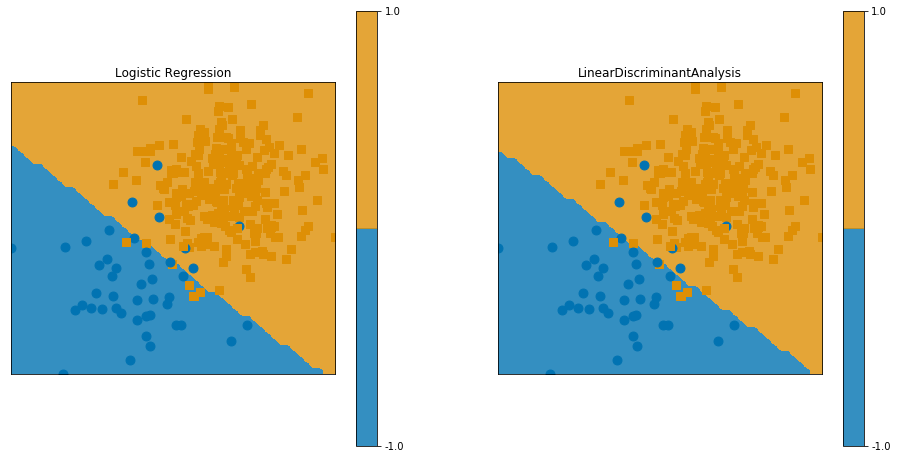

In [39]:
X, y = rand_bi_gauss(n1=500, n2=100, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9], sigmas2=[0.9, 0.9])

X_train, X_test, y_train, y_test = X[::2], X[1::2], y[::2], y[1::2]


plt.figure(23, figsize=(16, 8))

plt.subplot(121)
plt.title('Logistic Regression')
lr = linear_model.LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
frontiere_new(lambda x: lr.predict([x]), X_test, y_test)

plt.subplot(122)
plt.title('LinearDiscriminantAnalysis')
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
frontiere_new(lambda x: lda.predict([x]), X_test, y_test)

plt.show()

# 24)

In [40]:
n_samples = len(digits.images)
images_data = digits.images.reshape((n_samples, -1))

lr = linear_model.LogisticRegression(solver='liblinear', multi_class='auto')
# la première partie pour l’apprentissage
lr.fit(images_data[:n_samples // 2], digits.target[:n_samples // 2])
# la deuxième pour le test
y_test = digits.target[n_samples // 2:]
# y_pred = clf.predict(images_data[n_samples // 2:])
#1 - np.sum(np.array(y_test ==y_pred ), dtype="int") / len(images_data[n_samples // 2:])
print("taux d’erreur: ", 1 - lr.score(images_data[n_samples // 2:], y_test))


taux d’erreur:  0.08342602892102335
